In [ ]:
import tasks.postprocessing

main_df = tasks.postprocessing.main_dataset()
main_df

### Comment length

In [ ]:
len_df = df.copy()
len_df["comment_length"] = len_df.message.apply(lambda x: len(x.split()))
len_df = len_df.loc[
    len_df.model != "hardcoded", ["message_id", "comment_length", "model"]
]
len_df = len_df.drop_duplicates(subset=["message_id"])

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/comment_length.png


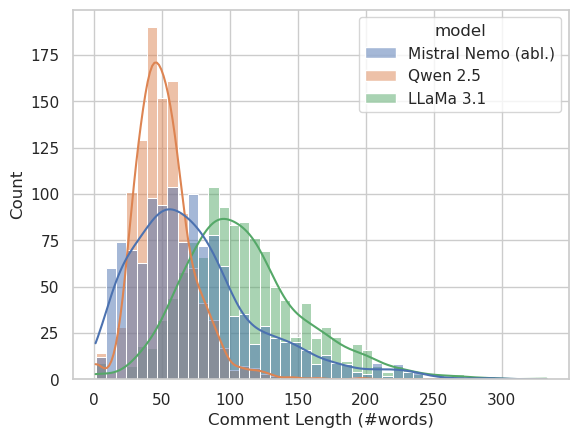

In [ ]:
sns.histplot(len_df, x="comment_length", hue="model", kde=True)
plt.xlabel("Comment Length (#words)")

tasks.graphs.save_plot(GRAPH_OUTPUT_DIR / "comment_length.png")
plt.show()

In [ ]:
message_df = df.copy()
message_df = message_df.drop_duplicates(subset=["conv_id", "message_id"])
# @ tokens crash bleu scorer
message_df.message = message_df.message.apply(
    lambda msg: " ".join(word for word in msg.split() if not word.startswith("@"))
)

similarity_df = (
    message_df.groupby(["conv_id", "model"])["message"]
    .apply(lambda messages: messages.tolist())
    .reset_index()
)
similarity_df.columns = ["conv_id", "model", "messages"]
similarity_df = similarity_df[similarity_df.model != "hardcoded"]

In [ ]:
similarity_df["rougel_similarity"] = similarity_df.messages.progress_apply(
    tasks.stats.pairwise_rougel_similarity
)

100%|██████████| 140/140 [02:13<00:00,  1.04it/s]


Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/discussion_variance.png


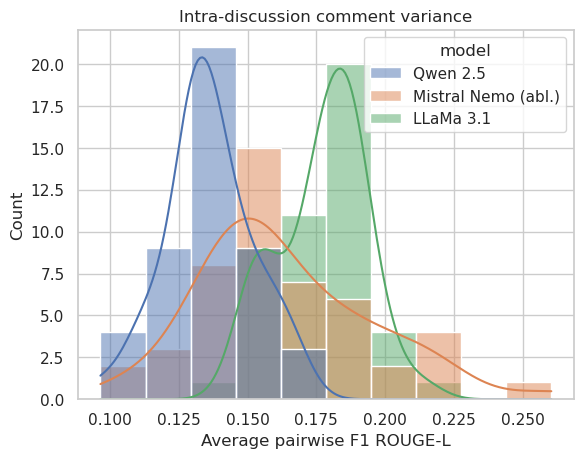

In [ ]:
sns.histplot(similarity_df, x="rougel_similarity", hue="model", kde=True)
plt.xlabel("Average pairwise F1 ROUGE-L")
plt.title("Intra-discussion comment variance")

tasks.graphs.save_plot(GRAPH_OUTPUT_DIR / "discussion_variance.png")
plt.show()